In [54]:
import numpy as np
import scipy
import scipy.linalg
import matplotlib.pyplot as plt

## Введение в высшую математику
#### 1. Решите линейную систему:

In [15]:
A = np.array([[1, 2, 3],
             [4, 0, 6],
             [7, 8, 9]])
B = np.array([12, 2, 1])

In [16]:
np.linalg.det(A)

59.999999999999986

In [17]:
A1 = np.linalg.inv(A)

In [18]:
np.dot(A1, B)

array([-9.2       ,  0.9       ,  6.46666667])

In [19]:
np.linalg.solve(A, B)

array([-9.2       ,  0.9       ,  6.46666667])

#### 2. Найдите псевдорешение:
x + 2y – z = 1

3x – 4y = 7

8x – 5y + 2z = 12

2x – 5z = 7

11x +4y – 7z = 15

In [21]:
A = np.array([[1,2,-1],
             [3,-4,0],
             [8,-5,2],
             [2,0,-5],
             [11,4,-7]])
B = np.array([1,7,12,7,15])

In [22]:
np.linalg.lstsq(A, B)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


(array([ 1.13919353, -0.90498444, -0.9009803 ]),
 array([0.71523211]),
 3,
 array([15.2817306 ,  9.59852942,  3.65197794]))

In [24]:
np.dot(A, [ 1.13919353, -0.90498444, -0.9009803 ]) - B

array([-0.76979505,  0.03751835, -0.16349016, -0.21671144,  0.21805317])

#### 3. Сколько решений имеет линейная система:
Если ноль – то измените вектор правой части так, чтобы система стала совместной, и решите ее.

In [40]:
A = np.array([[1,2,3],
             [4,5,6],
             [7,8,9]])
B = np.array([[12,2,1]])

In [43]:
C = np.concatenate((A,B.T), axis=1)
C

array([[ 1,  2,  3, 12],
       [ 4,  5,  6,  2],
       [ 7,  8,  9,  1]])

In [42]:
np.linalg.matrix_rank(A, 0.0001)

2

In [44]:
np.linalg.matrix_rank(C, 0.0001)

3

In [41]:
np.linalg.det(A)

6.66133814775094e-16

Определитель равен нулю, а ранг расширенной матрицы больше ранга матрицы А, значит система не имеет решений, векторы параллельны. Изменим правую часть:

In [47]:
B = np.array([[0,0,0]])

In [48]:
C = np.concatenate((A,B.T), axis=1)
C

array([[1, 2, 3, 0],
       [4, 5, 6, 0],
       [7, 8, 9, 0]])

In [49]:
np.linalg.matrix_rank(C, 0.0001)

2

Ранг расширенной матрицы стал равен рангу матрицы А и меньше кол-ва переменных, значит система имеет бесконечное множество решений.

#### Вычислите LU-разложение матрицы:
После этого придумайте вектор правых частей и решите полученную линейную систему трех уравнений с данной матрицей.

In [52]:
A = np.array([[1,2,3],
             [2,16,21],
             [4,28,73]])

In [58]:
P,L,U = scipy.linalg.lu(A)
print(P)
print(L)
print(U)

[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
[[ 1.    0.    0.  ]
 [ 0.25  1.    0.  ]
 [ 0.5  -0.4   1.  ]]
[[  4.    28.    73.  ]
 [  0.    -5.   -15.25]
 [  0.     0.   -21.6 ]]


In [60]:
C = np.dot(L,U)
C

array([[ 4., 28., 73.],
       [ 1.,  2.,  3.],
       [ 2., 16., 21.]])

In [84]:
B = np.array([15,3,12])

In [85]:
np.linalg.solve(C, B)

array([ 2.09722222,  0.74305556, -0.19444444])

#### Найдите нормальное псевдорешение недоопределенной системы:
#### x + 2y – z = 1
#### 8x – 5y + 2z = 12
Для этого определите функцию Q(x,y,z), равную норме решения, и найдите ее минимум. 


In [88]:
from mpl_toolkits.mplot3d import Axes3D
from pylab import figure
from pylab import show

In [86]:
A = np.array([[1,2,-1],
             [8,-5,2]])
B = np.array([1,12])

In [105]:
def Q(x,y,z):
    return (x**2+y**2+z**2)

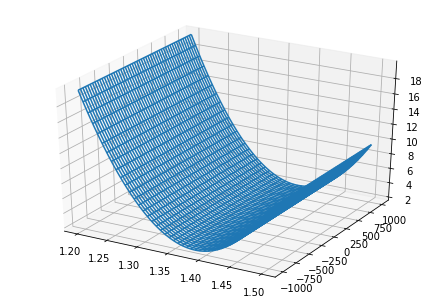

In [104]:
fig = figure()
ax = Axes3D(fig)

X = np.arange(1.2,1.5, 0.001)
Y = np.arange(-1000,1000, 1)
X, Y = np.meshgrid(X, Y)
Z = Q(X,(10*X-14),(21*X-29))


ax.plot_wireframe(X, Y, Z)

show()

Судя по графику Х в районе 1.35 - 1.40. Подставим в формулы среднее значение - 1.375:

In [107]:
x=1.375

In [108]:
z=21*x-29
y=10*x-14
print(x,y,z)

1.375 -0.25 -0.125


Решение близко к решению через numpy

In [87]:
np.linalg.lstsq(A,B)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


(array([ 1.38191882, -0.18081181,  0.0202952 ]),
 array([], dtype=float64),
 2,
 array([9.65316119, 2.41173777]))

#### 6. Найдите одно из псевдорешений вырожденной системы:
Попробуйте также отыскать и нормальное псевдорешение.

In [109]:
A = np.array([[1,2,3],
             [4,5,6],
             [7,8,9]])
B = np.array([2,5,11])

In [110]:
P,L,U = scipy.linalg.lu(A)
print(P)
print(L)
print(U)

[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
[[1.         0.         0.        ]
 [0.14285714 1.         0.        ]
 [0.57142857 0.5        1.        ]]
[[7.00000000e+00 8.00000000e+00 9.00000000e+00]
 [0.00000000e+00 8.57142857e-01 1.71428571e+00]
 [0.00000000e+00 0.00000000e+00 1.11022302e-16]]


In [111]:
C = np.dot(L,U)
C

array([[7., 8., 9.],
       [1., 2., 3.],
       [4., 5., 6.]])

In [112]:
np.linalg.solve(C, B)

array([ 6.75539944e+16, -1.35107989e+17,  6.75539944e+16])

In [113]:
np.linalg.lstsq(A,B)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


(array([ 1.25,  0.5 , -0.25]),
 array([], dtype=float64),
 2,
 array([1.68481034e+01, 1.06836951e+00, 1.47280825e-16]))

In [116]:
Q,R = np.linalg.qr(A)
print(Q)
print(R)

[[-0.12309149  0.90453403  0.40824829]
 [-0.49236596  0.30151134 -0.81649658]
 [-0.86164044 -0.30151134  0.40824829]]
[[-8.12403840e+00 -9.60113630e+00 -1.10782342e+01]
 [ 0.00000000e+00  9.04534034e-01  1.80906807e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.77635684e-15]]


In [117]:
np.dot(Q,R)

array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]])

In [118]:
R1 = R[:2, :2]
R1

array([[-8.1240384 , -9.6011363 ],
       [ 0.        ,  0.90453403]])

In [119]:
B1 = np.dot(np.transpose(Q), B)[:2]
B1

array([-1.21860576e+01,  8.43769499e-15])

In [120]:
X1 = np.linalg.solve(R1, B1)
X1

array([1.50000000e+00, 9.32822279e-15])

In [121]:
X = np.append(X1, 0)
X

array([1.50000000e+00, 9.32822279e-15, 0.00000000e+00])

In [122]:
np.linalg.norm(X)

1.4999999999999896

In [123]:
np.linalg.norm(np.dot(A,X)-B)

1.2247448713915894

In [124]:
X = np.array([ 1.25,  0.5 , -0.25])
np.linalg.norm(X)

1.3693063937629153

In [125]:
np.linalg.norm(np.dot(A,X)-B)

1.224744871391589